In [1]:
print('Walmart es zona de gente seria')

Walmart es zona de gente seria


In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
import psycopg2


In [5]:
user = 'kzvwgmey'
dbname = 'kzvwgmey'
host = 'batyr.db.elephantsql.com'
password = 'Fch8wl_TUVAul6pV-1z4Z-fXyKwEBPRs'

myConnection = psycopg2.connect(host = host, user = user, password = password, dbname = dbname)


In [11]:
def SelectAllQuery(query):
    cur = myConnection.cursor()
    try:
        cur.execute(query)
        data = cur.fetchall()
        colnames = [desc[0] for desc in cur.description]
    except Exception as e:
        myConnection.commit()
        print('Error en el query:', e)
    else:
        cur.close()
        myConnection.commit()
        
        return(data,colnames) 

In [35]:
queryStore = f'''
  SELECT * FROM "Hechos_Ventas"
  INNER JOIN "Dimension_Tiempo_Ventas" USING (id_dtiempo)
  '''
hechosVentas = SelectAllQuery(queryStore)
dfHechosVentas = pd.DataFrame(hechosVentas[0], columns = hechosVentas[1])
print(dfHechosVentas)

     id_dtiempo  id_hventas  id_dtienda  id_dproducto  id_dmarca  unidades  \
0            14           1           1             3          8         4   
1           213           2           1             3          8         4   
2            14           3           1            37          1         8   
3           213           4           1            37          1         8   
4            14           5           1            59         16         8   
..          ...         ...         ...           ...        ...       ...   
983         212         984           2           100          7         0   
984         354         985           2           100          7         0   
985         356         986           2           100          7         0   
986         357         987           2           100          7        12   
987         357         988           2           100          7        12   

     anio  mes  semana  dia  hora  
0    2021    6      24    7

In [48]:
queryStore = f'''
  SELECT  SUM((unidades*precio)) AS "venta", anio, mes, semana, dia,hora FROM "Hechos_Ventas"
  INNER JOIN "Dimension_Tiempo_Ventas" USING (id_dtiempo)
  INNER JOIN "Dimension_Producto" USING (id_dproducto)
  GROUP BY anio, mes,semana, dia, hora
  HAVING SUM((unidades*precio)) > 0 
  ORDER BY anio, mes, semana, dia, hora
  '''
hechosVentas = SelectAllQuery(queryStore)
dfHechosVentas = pd.DataFrame(hechosVentas[0], columns = hechosVentas[1])
print(dfHechosVentas)

      venta  anio  mes  semana  dia  hora
0   1063.08  2021    6      24    7     9
1     36.90  2021    6      24    7    11
2    885.60  2021    6      24    7    13
3    328.00  2021    6      24    7    15
4    738.00  2021    6      24    7    16
..      ...   ...  ...     ...  ...   ...
69  2361.60  2021    6      25    7    15
70    73.80  2021    6      25    7    16
71   131.20  2021    6      25    7    17
72    32.80  2021    6      25    7    18
73    98.40  2021    6      26    2    12

[74 rows x 6 columns]


In [49]:
X = dfHechosVentas['hora'].values.reshape(-1,1) # Como X solo tiene 1 tenemos que 'reshape' para asegurar que siga siendo una matrix (array) y no un vector (-1,)
y = dfHechosVentas['venta'].values

In [50]:
X.shape

(74, 1)

In [51]:
y.shape

(74,)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (62, 1)
La forma de y_train es:  (62,)
La forma de X_test es:  (12, 1)
La forma de y_test es:  (12,)


In [53]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_train, y_train)

LinearRegression()

In [78]:
y_fit = regresor.predict(X_train)
y_pred = regresor.predict(X_test) 

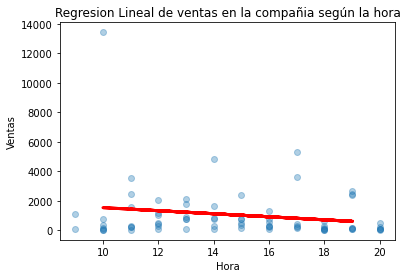

In [71]:


plt.scatter(X, y, alpha=0.35)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Regresion Lineal de ventas en la compañia según la hora')
plt.xlabel('Hora')
plt.ylabel('Ventas')
plt.show()

In [74]:
lr = linear_model.LinearRegression() ##Declaración del algoritmo a utilizar.

In [76]:
Y_pred = regresor.predict(X_test)

In [79]:
y_pred

array([1321.24019858,  908.36609592, 1114.80314725,  908.36609592,
       1527.67724991,  598.71051892, 1424.45872424, 1218.02167291,
        701.92904459,  598.71051892, 1011.58462158,  598.71051892])

In [141]:
def prediccion(numero):
    if numero < 9 or numero > 20:
        return ('A esta hora no se trabaja, se venden $0')
    return f'A la hora militar {numero} se predice que se venderan ${"{0:.2f}".format(y_pred[numero-9])}'

In [146]:
num = input('Ingrese una hora entre las 9 y las 20 para predecir cuanto dinero se vendera en la tienda a esa hora:\n')
print(prediccion(int(num))) if num.isdigit() else print('Tiene que ser un numero entero entre el 9 y el 20, intente de nuevo')

Ingrese una hora entre las 9 y las 20 para predecir cuanto dinero se vendera en la tienda a esa hora:
 21


A esta hora no se trabaja, se venden $0


In [124]:
a = input ('es decimal?')
print(a.isdigit())

es decimal? 20


True
